In [1]:
#Testing Technical Indicator with Machine Learning Predictions
import pandas as pd
import yfinance as yf
import pandas_ta as ta
df = yf.download(tickers = 'BTC-USD', start='2014-09-23', end = '2023-11-10')
#df = yf.download(tickers = 'BTC-USD', start='2020-01-10', end = '2023-11-10')
df.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800
2014-09-27,403.556000,406.622986,397.372009,399.519989,399.519989,15029300
2014-09-28,399.471008,401.016998,374.332001,377.181000,377.181000,23613300
2014-09-29,376.928009,385.210999,372.239990,375.467010,375.467010,32497700
2014-09-30,376.088013,390.976990,373.442993,386.944000,386.944000,34707300
2014-10-01,387.427002,391.378998,380.779999,383.614990,383.614990,26229400


In [2]:
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [3]:
import pandas_ta as pa
help(pa.ema)

Help on function ema in module pandas_ta.overlap.ema:

ema(close, length=None, talib=None, offset=None, **kwargs)
    Exponential Moving Average (EMA)
    
    The Exponential Moving Average is more responsive moving average compared to the
    Simple Moving Average (SMA).  The weights are determined by alpha which is
    proportional to it's length.  There are several different methods of calculating
    EMA.  One method uses just the standard definition of EMA and another uses the
    SMA to generate the initial value for the rest of the calculation.
    
    Sources:
        https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:moving_averages
        https://www.investopedia.com/ask/answers/122314/what-exponential-moving-average-ema-formula-and-how-ema-calculated.asp
    
    Calculation:
        Default Inputs:
            length=10, adjust=False, sma=True
        if sma:
            sma_nth = close[0:length].sum() / length
            close[:length - 1] = n

In [4]:
df["RSI"] = pa.rsi(df.Close, length=16) #The Relative Strength Index is popular momentum oscillator used to measure the velocity as well as the magnitude of directional price movements.
df["CCI"] = pa.cci(df.High, df.Low, df.Close, length=16) #Commodity Channel Index is a momentum oscillator used to primarily identify overbought and oversold levels relative to a mean.
df["AO"] = pa.ao(df.High, df.Low) #The Awesome Oscillator is an indicator used to measure a security's momentum. AO is generally used to affirm trends or to anticipate possible reversals.
df["MOM"] = pa.mom(df.Close, length=16) #Momentum is an indicator used to measure a security's speed (or strength) of movement.  Or simply the change in price.
a = pa.macd(df.Close) #The MACD is a popular indicator to that is used to identify a security's trend. While APO and MACD are the same calculation, MACD also returns two more series called Signal and Histogram. The Signal is an EMA of MACD and the Histogram is the difference of MACD and Signal. #Returns: pd.DataFrame: macd, histogram, signal columns. 
df = df.join(a)
df["ATR"] = pa.atr(df.High, df.Low, df.Close, length=16) #Averge True Range is used to measure volatility, especially volatility caused by gaps or limit moves.
df["BOP"] = pa.bop(df.Open, df.High, df.Low, df.Close, length=16) #Balance of Power measure the market strength of buyers against sellers.
df["RVI"] = pa.rvi(df.Close) #The Relative Volatility Index (RVI) was created in 1993 and revised in 1995. Instead of adding up price changes like RSI based on price direction, the RVI adds up standard deviations based on price direction.
a = pa.dm(df.High, df.Low, length=16) #The Directional Movement was developed by J. Welles Wilder in 1978 attempts to determine which direction the price of an asset is moving. It compares prior highs and lows to yield to two series +DM and -DM.
df = df.join(a)
a = pa.stoch(df.High, df.Low, df.Close) #The Stochastic Oscillator (STOCH) was developed by George Lane in the 1950's. He believed this indicator was a good way to measure momentum because changes in momentum precede changes in price.
df = df.join(a)
a = pa.stochrsi(df.Close, length=16) #"Stochastic RSI and Dynamic Momentum Index" was created by Tushar Chande and Stanley Kroll and published in Stock & Commodities V.11:5 (189-199)
df = df.join(a)
df["WPR"] = pa.willr(df.High, df.Low, df.Close, length=16) #William's Percent R is a momentum oscillator similar to the RSI that attempts to identify overbought and oversold conditions.
df["EMAF"]=pa.ema(df.Close, length=10) #The Exponential Moving Average is more responsive moving average compared to the Simple Moving Average (SMA).  The weights are determined by alpha which is proportional to it's length.  There are several different methods of calculating EMA.  One method uses just the standard definition of EMA and another uses the SMA to generate the initial value for the rest of the calculation.
df["EMAM"]=pa.ema(df.Close, length=22)
df["EMAS"]=pa.ema(df.Close, length=55)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,CCI,AO,MOM,...,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR,EMAF,EMAM,EMAS
Date,,,,,,,,,,,,,,,,,,,,,
2023-11-05,35090.011719,35340.339844,34594.242188,35049.355469,35049.355469,12412743996,76.260697,68.943095,4314.098472,5366.406250,...,349.900487,53.955349,84.363882,86.069960,30.100712,46.340044,-13.520905,34434.749902,32809.838623,30360.805965
2023-11-06,35044.789062,35286.027344,34765.363281,35037.371094,35037.371094,12693436420,76.110724,75.539233,4126.313701,5118.958984,...,328.031706,50.583139,80.833127,83.357904,20.291204,31.657482,-14.234506,34544.317392,33003.537099,30527.826149
2023-11-07,35047.792969,35892.417969,34545.816406,35443.562500,35443.562500,18834737789,77.696459,116.778117,3912.061949,5449.666016,...,345.429139,47.421693,78.994039,81.397016,17.858515,22.750144,-8.180693,34707.816502,33215.713220,30703.388161
2023-11-08,35419.476562,35994.417969,35147.800781,35655.277344,35655.277344,17295394918,78.490261,147.769160,3888.181302,2569.042969,...,330.214817,44.457837,79.592069,79.806412,21.230402,19.793374,-10.892038,34880.082110,33427.849231,30880.241346
2023-11-09,35633.632812,37926.257812,35592.101562,36693.125000,36693.125000,37762672382,81.865174,249.640744,3987.299833,2791.597656,...,430.316382,41.679223,80.155892,79.580667,36.020909,25.036609,-27.346004,35209.726272,33711.786254,31087.844334


In [5]:
df.isna().sum()
df.dropna(inplace=True)
df.isna().sum()

Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
RSI                    0
CCI                    0
AO                     0
MOM                    0
MACD_12_26_9           0
MACDh_12_26_9          0
MACDs_12_26_9          0
ATR                    0
BOP                    0
RVI                    0
DMP_16                 0
DMN_16                 0
STOCHk_14_3_3          0
STOCHd_14_3_3          0
STOCHRSIk_16_14_3_3    0
STOCHRSId_16_14_3_3    0
WPR                    0
EMAF                   0
EMAM                   0
EMAS                   0
dtype: int64

In [6]:
df.reset_index(drop=True, inplace=True)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,CCI,AO,MOM,...,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR,EMAF,EMAM,EMAS
3276,35090.011719,35340.339844,34594.242188,35049.355469,35049.355469,12412743996,76.260697,68.943095,4314.098472,5366.406250,...,349.900487,53.955349,84.363882,86.069960,30.100712,46.340044,-13.520905,34434.749902,32809.838623,30360.805965
3277,35044.789062,35286.027344,34765.363281,35037.371094,35037.371094,12693436420,76.110724,75.539233,4126.313701,5118.958984,...,328.031706,50.583139,80.833127,83.357904,20.291204,31.657482,-14.234506,34544.317392,33003.537099,30527.826149
3278,35047.792969,35892.417969,34545.816406,35443.562500,35443.562500,18834737789,77.696459,116.778117,3912.061949,5449.666016,...,345.429139,47.421693,78.994039,81.397016,17.858515,22.750144,-8.180693,34707.816502,33215.713220,30703.388161
3279,35419.476562,35994.417969,35147.800781,35655.277344,35655.277344,17295394918,78.490261,147.769160,3888.181302,2569.042969,...,330.214817,44.457837,79.592069,79.806412,21.230402,19.793374,-10.892038,34880.082110,33427.849231,30880.241346
3280,35633.632812,37926.257812,35592.101562,36693.125000,36693.125000,37762672382,81.865174,249.640744,3987.299833,2791.597656,...,430.316382,41.679223,80.155892,79.580667,36.020909,25.036609,-27.346004,35209.726272,33711.786254,31087.844334


In [7]:
#Target columnn
pipdiff = 1000 #for TP
SLTPRatio = 2 #pipdiff/Ratio gives SL
def mytarget(barsupfront, df1):
    length = len(df1)
    high = list(df1['High'])
    low = list(df1['Low'])
    close = list(df1['Close'])
    open = list(df1['Open'])
    trendcat = [None] * length
    for line in range (0,length-barsupfront-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,barsupfront+2):
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)
        #if ( (valueOpenLow >= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 2 # bth limits exceeded
        #elif ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 3 #-1 downtrend
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
        #    trendcat[line] = 1 # uptrend
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 0 # no trend
        #elif ( (valueOpenLow >= (pipdiff/SLTPRatio)) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 5 # light trend down
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 4 # light trend up
            if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                trendcat[line] = 1 #-1 downtrend
                break
            elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend
            
    return trendcat

<AxesSubplot:>

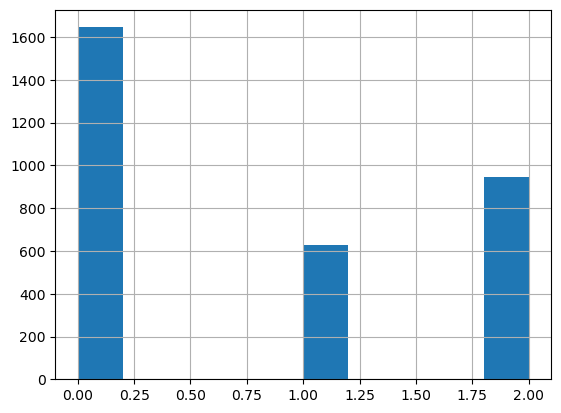

In [8]:
df['Target'] = mytarget(60, df)
df['Target'].hist()
#df.tail(60)
#df['Target'] = df['Target'].astype(int)

In [9]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,CCI,AO,MOM,...,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR,EMAF,EMAM,EMAS,Target
3214,25968.169922,26081.525391,25657.025391,25812.416016,25812.416016,10680635106,36.682134,-75.186124,-1580.635777,-283.789062,...,205.820952,19.106573,18.314778,52.362879,52.023072,-83.503798,26199.313648,26757.741515,27750.321600,0.0
3215,25814.957031,25858.375000,25589.988281,25779.982422,25779.982422,11094740040,36.445454,-88.066852,-1646.609869,-409.601562,...,197.146962,18.020823,18.697015,51.304045,51.991123,-84.693267,26123.071607,26672.718985,27679.952343,0.0
3216,25783.931641,25953.015625,25404.359375,25753.236328,25753.236328,12752705327,36.239777,-87.714455,-1557.105216,-370.904297,...,196.427083,15.376261,17.501219,49.067744,50.911556,-85.674153,26055.828829,26592.763971,27611.141057,0.0
3217,25748.312500,26409.302734,25608.201172,26240.195312,26240.195312,11088307100,42.537561,-16.525987,-1436.958743,208.539062,...,184.150391,20.605718,18.000934,54.333370,51.568386,-67.815427,26089.350008,26562.105827,27562.178709,1.0
3218,26245.208984,26414.005859,25677.480469,25905.654297,25905.654297,10817356400,39.666468,-30.414017,-1330.451970,-525.986328,...,172.640991,22.142014,19.374664,55.799950,53.067022,-80.084379,26055.950788,26505.023085,27503.017123,0.0


In [10]:
#ML MODEL
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss

attributes = ['RSI', 'CCI', 'AO', 'MOM', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ATR',
       'BOP', 'RVI', 'DMP_16', 'DMN_16', 'STOCHk_14_3_3', 'STOCHd_14_3_3',
       'STOCHRSIk_16_14_3_3', 'STOCHRSId_16_14_3_3', 'WPR','EMAF', 'EMAM', 'EMAS']

#attributes = ['MACDs_12_26_9', 'ATR', 'DMP_16']

X = df[attributes]
y = df['Target']

train_pct_index = int(0.7 * len(X)) #data fro training
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

C:\Users\Julio\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


****Train Results****
Accuracy: 100.0000%
****Test Results****
Accuracy: 36.5424%


In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix_train = confusion_matrix(y_train, pred_train)
matrix_test = confusion_matrix(y_test, pred_test)

print(matrix_train)
print(matrix_test)

report_train = classification_report(y_train, pred_train)
report_test = classification_report(y_test, pred_test)

print("=======TRAIN DATA=======")
print(report_train)
print("=======TEST DATA=======")
print(report_test)
#choices = [2, 0, -1, +1]
##choices = [2, 0, 3, +1]
print(model.get_booster().feature_names)

[[1272    0    0]
 [   0  342    0]
 [   0    0  639]]
[[120  72 182]
 [ 80  52 153]
 [ 75  51 181]]
=======TRAIN DATA=======
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1272
         1.0       1.00      1.00      1.00       342
         2.0       1.00      1.00      1.00       639

    accuracy                           1.00      2253
   macro avg       1.00      1.00      1.00      2253
weighted avg       1.00      1.00      1.00      2253

=======TEST DATA=======
              precision    recall  f1-score   support

         0.0       0.44      0.32      0.37       374
         1.0       0.30      0.18      0.23       285
         2.0       0.35      0.59      0.44       307

    accuracy                           0.37       966
   macro avg       0.36      0.36      0.35       966
weighted avg       0.37      0.37      0.35       966

['RSI', 'CCI', 'AO', 'MOM', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ATR', 'BO

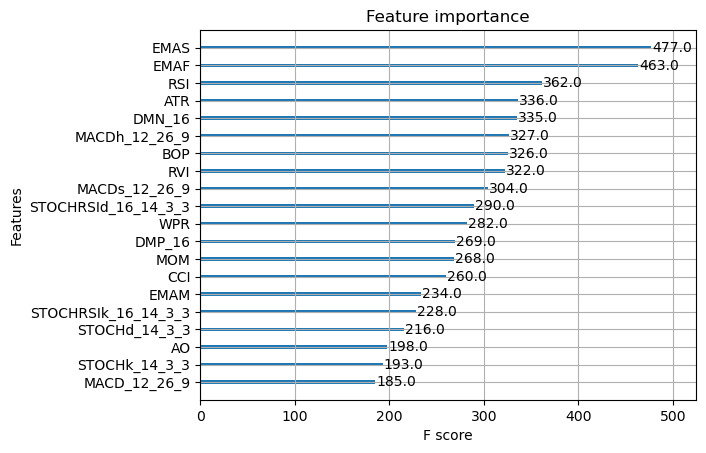

['RSI', 'CCI', 'AO', 'MOM', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ATR', 'BOP', 'RVI', 'DMP_16', 'DMN_16', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'STOCHRSIk_16_14_3_3', 'STOCHRSId_16_14_3_3', 'WPR', 'EMAF', 'EMAM', 'EMAS']


In [12]:
from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
#pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
#plot feature importance
plot_importance(model)
pyplot.show()
print(model.get_booster().feature_names)